## Lecture 1 - Lösungsvorschläge

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.metrics import mean_squared_error 

%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

## Load Datset

In [2]:
from sklearn.datasets import load_diabetes


# Load the Diabetes dataset
diabetes = load_diabetes()

# The dataset is stored as a dictionary-like object with various attributes
# You can access the data, target, feature names, and other information from the dictionary
data = diabetes.data  # Features
target = diabetes.target  # Target (diabetes progression)
feature_names = diabetes.feature_names  # Feature names

# Create a Pandas DataFrame to work with the data more easily (optional)
diabetes_df = pd.DataFrame(data, columns=feature_names)
diabetes_df['Target'] = target  # Adding the target column

# Display the first few rows of the DataFrame with the Input Features
diabetes_df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
from sklearn.model_selection import train_test_split

# Assuming you have a single DataFrame 'df' with features and target
X = diabetes_df['bmi'] # Features (all columns except the target)
y = diabetes_df['Target']  # Target variable


### Aufgabe 1) Einfluß der Größe der Trainingsmenge

Bisher haben wir 25% der Daten zum Testen zurückbehalten und auf dem Rest trainiert.

- Variieren Sie die Größe der Trainingsmenge zwischen 50% und 90% in einer Schleife
- Lassen Sie sich die Trainings- und Testfehler in eine Liste schreiben
- Erstellen Sie 3 Plots:

    1) RMSE für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    2) $\rho$ für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    3) bias für die Trainings- und Testmenge aufgetragen gegen die Größe der Testmenge  
    

- Gibt es eine optimale Aufteilung?

In [4]:
# initialize the empty arrays
percentage_te = []
RMSE_tr_list = []
RMSE_te_list = []
Residuals_tr = []
Residuals_te = []
Data_List_tr = []

# Your loop over the variable k
# You need to specify the value of num_iterations
num_iterations=90

for k in range(10, num_iterations + 1):  
    
    percentage=k/100;
    X_train_bmi_1, X_test_bmi_1, y_train, y_test = train_test_split(X, y, test_size=percentage);
    dataList=np.transpose(np.array([X_train_bmi_1,y_train]))
    
    X_train_bmi = sm.add_constant(X_train_bmi_1)
    X_test_bmi = sm.add_constant(X_test_bmi_1)
    
    olsmod_LinReg = sm.OLS(y_train, X_train_bmi)
    olsres_LinReg = olsmod_LinReg.fit()

    y_hat_LinReg_tr = olsres_LinReg.predict(X_train_bmi)
    y_hat_LinReg_te = olsres_LinReg.predict(X_test_bmi)

    rmseLMTr = sqrt(mean_squared_error(y_train, y_hat_LinReg_tr))
    rmseLMTe = sqrt(mean_squared_error(y_test, y_hat_LinReg_te))
    
    
    percentage_te.append(1-percentage)
    RMSE_tr_list.append(rmseLMTr)
    RMSE_te_list.append(rmseLMTe)
    Residuals_tr.append(y_train - y_hat_LinReg_tr)
    Residuals_te.append(y_test - y_hat_LinReg_te)
    Data_List_tr.append(dataList)




In [5]:
Residuals_te;

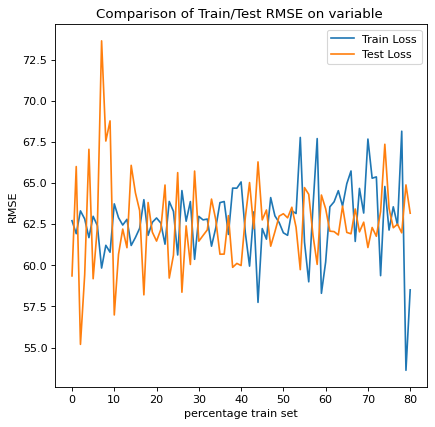

In [6]:
# Plot size
plt.figure(figsize=(6, 6), dpi=80)

plt.plot(RMSE_tr_list,  label='Train Loss');
plt.plot(RMSE_te_list, label='Test Loss');

plt.xlabel('percentage train set')
plt.ylabel('RMSE') 
plt.title('Comparison of Train/Test RMSE on variable ')

#position of labels
plt.legend(); 



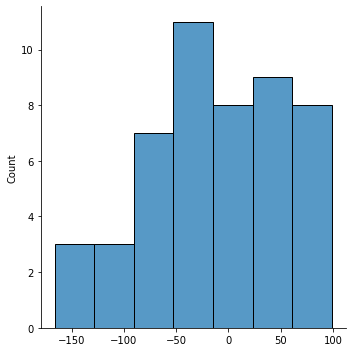

In [7]:
sns.displot(Residuals_te[1]);

In [8]:
len(Residuals_te)

81

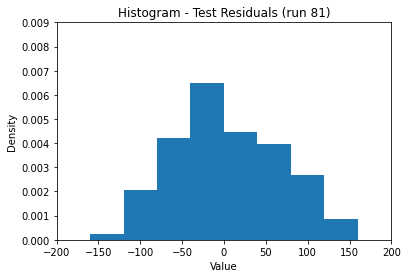

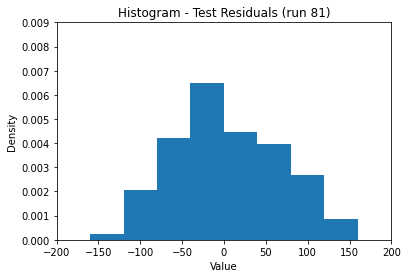

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Assuming you have an array 'data' with 50 lists
# Modify this array with your data
data = Residuals_te;

# Create a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_xlim(-200, 200)
ax.set_ylim(0, 100)

# Create an empty histogram for the initial frame
hist, bins, _ = ax.hist([])

# Function to update the histogram for each frame
def update(frame):
    ax.cla()  # Clear the axis for the new frame

    # Plot the histogram for a specific list in the data array
    hist, bins, _ = ax.hist(data[frame], range=(-200, 200),density=True)
    
    # Customize the plot
    ax.set_title(f'Histogram - Test Residuals (run {frame + 1})')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    #ax.grid(True)
    # Set fixed x-axis and y-axis limits for each frame
    ax.set_xlim(-200, 200)
    ax.set_ylim(0, 0.009)

    # Display the plot and clear the output for the next frame
    clear_output(wait=True)
    display(fig)
    time.sleep(0.1)  # Adjust the sleep duration to control the animation speed

# Iterate through the frames and update the plot
for frame in range(len(data)):
    update(frame)


### Aufgabe 2) Exponentielles Modell

Wir haben in der Vorlesung gesehen, daß es mit Hilfe der gleichen Lösungsmethodik möglich ist auch ein exponentielles Modell zu schätzen

$y=b_0\cdot e^{b_1x}$

indem man logarithmiert:

$\ln{(y)}=\ln{(b_0)}+b_1x$

und die Variablentransformationen

$\tilde{y}=\ln{(y)}$ sowie $\tilde{b_0}=\ln{(b_0)}$ einführt.  

- Transformieren Sie die Zielgröße und schätzen Sie die Parameter des exponentiellen Modelles.
- Stellen Sie die Prognosen graphisch dar
- Analysieren Sie die Residuen graphisch (Histogramm, Scatter Plot output vs. target...)
- Werten Sie das exponentielle Modell auf der Trainings- und Testmenge aus indem Sie quantitative Performance-Metriken bestimmen.
- Wie schneidet das Modell im Vergleich zur linearen Einfachregression ab?
- Wiederholen Sie die Analyse von Aufgabe 1) für das exponentielle Modell
- Vergleichen Sie die Ergebnisse

Lösung ganz analog mit logarithmierter Zielgröße Target=y...